# Turner Labs Visualisation and Data Analysis

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import ttest_1samp

### Load the files and set visual parameters 

In [31]:
phen_file_paths = ['/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Phenytoin/Single-PS-24032026-Ch-1-100s-300s PS(pre).txt', 
              '/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Phenytoin/Single-PS-24032026-Ch-1-1000s-1200s PS(drug).txt',
              '/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Phenytoin/Single-PS-24032029-Ch-1-1000s-1200s PS(wash).txt'
             ]

li_file_paths = ['/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Li Gamma Power Spec/Single-PS-24031313-Ch-1-1300s-1500s PS.txt', #baseline
                 '/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Li Gamma Power Spec/Single-PS-24031314-Ch-1-700s-900s PS.txt', #Drug
                 '/Users/dylanlowe/Desktop/Coding/Turner Labs/Data/Li Gamma Power Spec/Single-PS-24031314-Ch-1-1250s-1450s PS.txt', #wash 
                ]
                 
phen_labels = ['Baseline', '100µM Phenytoin', 'Wash']
li_labels = ['Baseline', '5mM Lithium', 'Wash']
colors = ['royalblue', 'darkorange', 'forestgreen']
offset = 0
offset_increment = 0.0002


### Phenytoin Power Spec

(0.0, 120.0)

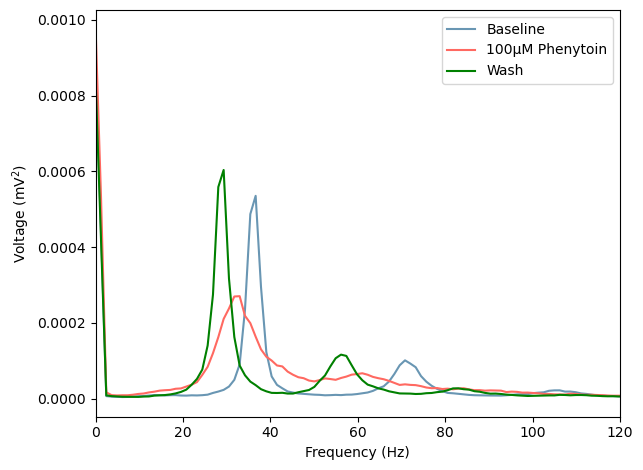

In [101]:
for phen_file_path, phen_label, color in zip(phen_file_paths, phen_labels, colors):
    data = np.genfromtxt(phen_file_path, skip_header=1, delimiter="\t")
    frequencies = data[:, 0]
    power_density = data[:, 1]
    plt.plot(frequencies, power_density, label=phen_label, color=color, linestyle='-', linewidth=1.5)
    
plt.xlabel('Frequency (Hz)', fontsize=10)
plt.ylabel('Voltage (mV$^2$)', fontsize=10)

plt.legend(loc='upper right')
plt.tight_layout()
plt.xlim(0,120)

### Li Gamma Power Spectrum

(0.0, 0.001)

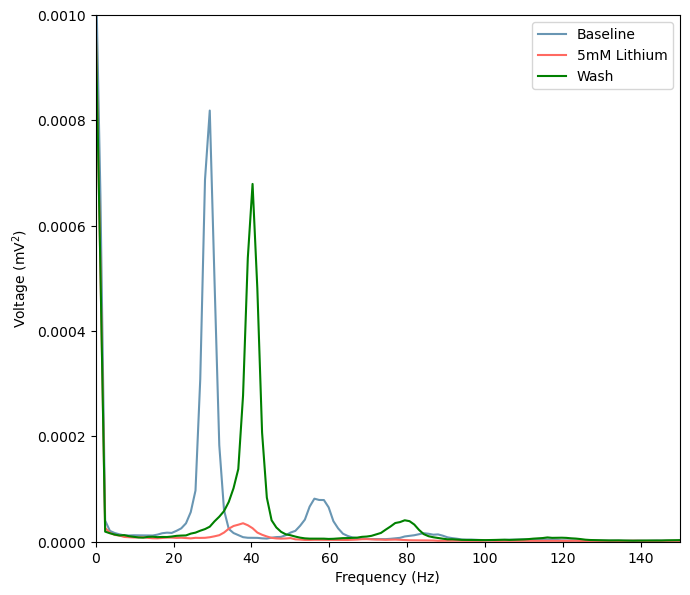

In [108]:
plt.figure(figsize=(7, 6))
for li_file_path, li_label, color in zip(li_file_paths, li_labels, colors):
    data = np.genfromtxt(li_file_path, skip_header=1, delimiter="\t")
    frequencies = data[:, 0]
    power_density = data[:, 1]
    plt.plot(frequencies, power_density, label=li_label, color=color, linestyle='-', linewidth=1.5)
    
plt.xlabel('Frequency (Hz)', fontsize=10)
plt.ylabel('Voltage (mV$^2$)', fontsize=10)
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlim(0,150)
plt.ylim(0, 0.001)

### Q factor plots and stats for phenytoin 

In [55]:
# Data dictionaries for phenytoin
phen_50_Q_data = {'Control':[5.7, 15.75, 6.9],
                  'Drug': [1.75, 4.9167, 4.3571], 
                  'Wash': [3.3571, 10.1667, 5.25]
                 }
phen_100_Q_data = {'Control': [10.1667, 5.25],
                   'Drug': [3.0556, 3.9286],
                   'Wash': [8.1667, 4.0714]
                  }
phen_200_Q_data = {'Control': [15.25, 8.1667, 4.0714], 
                   'Drug': [2.8333, 1.2059, 1.0833], 
                   'Wash': [5.7, 4.5, 3.9167]
                  }

In [57]:
# Function to normalize each dataset
def normalize_dataset(data):
    normalized_data = {'Control': [100] * len(data['Control']), 'Drug': [], 'Wash': []}
    for i in range(len(data['Control'])):
        control_value = data['Control'][i]
        normalized_data['Drug'].append((data['Drug'][i] / control_value) * 100)
        normalized_data['Wash'].append((data['Wash'][i] / control_value) * 100)
    return normalized_data

# Normalize each dataset
normalized_phen_50 = normalize_dataset(phen_50_Q_data)
normalized_phen_100 = normalize_dataset(phen_100_Q_data)
normalized_phen_200 = normalize_dataset(phen_200_Q_data)

# Output the normalized data
print("Normalized Data for Phen_50:")
print(normalized_phen_50)
print("Normalized Data for Phen_100:")
print(normalized_phen_100)
print("Normalized Data for Phen_200:")
print(normalized_phen_200)


Normalized Data for Phen_50:
{'Control': [100, 100, 100], 'Drug': [30.701754385964914, 31.217142857142854, 63.146376811594195], 'Wash': [58.89649122807017, 64.55047619047619, 76.08695652173913]}
Normalized Data for Phen_100:
{'Control': [100, 100], 'Drug': [30.054983426283847, 74.83047619047619], 'Wash': [80.3279333510382, 77.55047619047618]}
Normalized Data for Phen_200:
{'Control': [100, 100, 100], 'Drug': [18.579016393442622, 14.766062179338041, 26.607555140737833], 'Wash': [37.37704918032787, 55.101815910955466, 96.2003242128015]}


In [59]:
# Function to perform paired t-tests
def test_against_control(data, control_key='Control'):
    results = {}
    control_values = data[control_key]
    for condition, values in data.items():
        if condition != control_key:
            # Perform one-sample t-test against the hypothesized mean (100)
            t_statistic, p_value = ttest_1samp(values, popmean=100)
            results[condition] = {'t_statistic': t_statistic, 'p_value': p_value}
    return results

# Perform tests for each dataset
test_results_phen_50 = test_against_control(normalized_phen_50)
test_results_phen_100 = test_against_control(normalized_phen_100)
test_results_phen_200 = test_against_control(normalized_phen_200)

# Output the test results
print("Test Results for Phen_50:")
print(test_results_phen_50)
print("Test Results for Phen_100:")
print(test_results_phen_100)
print("Test Results for Phen_200:")
print(test_results_phen_200)

Test Results for Phen_50:
{'Drug': {'t_statistic': -5.434439337038211, 'p_value': 0.03223213232677036}, 'Wash': {'t_statistic': -6.620436203215826, 'p_value': 0.022063074779247127}}
Test Results for Phen_100:
{'Drug': {'t_statistic': -2.124254464024671, 'p_value': 0.28009856029133406}, 'Wash': {'t_statistic': -15.165523003048682, 'p_value': 0.04191741404069711}}
Test Results for Phen_200:
{'Drug': {'t_statistic': -22.928456427845394, 'p_value': 0.0018967642811857208}, 'Wash': {'t_statistic': -2.129896845406253, 'p_value': 0.16691896601872935}}


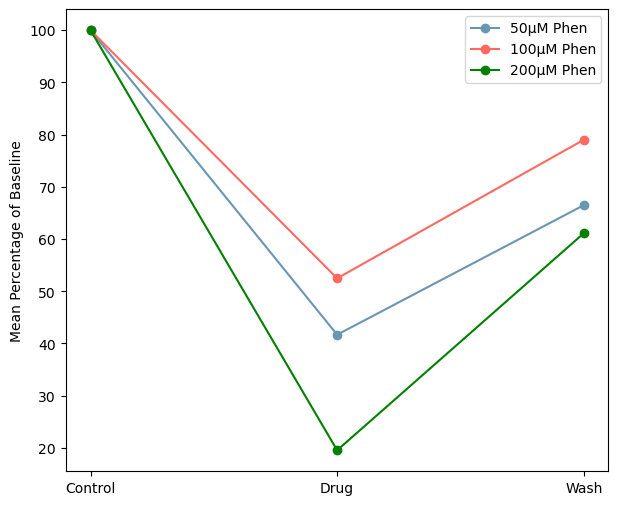

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Normalized data (data from previous normalization)
data = {
    '50': {
        'Control': [100, 100, 100],
        'Drug': [30.7018, 31.2102, 63.1391],
        'Wash': [58.8993, 64.4828, 76.0869]
    },
    '100': {
        'Control': [100, 100],
        'Drug': [30.1351, 74.8190],
        'Wash': [80.3986, 77.6383]
    },
    '200': {
        'Control': [100, 100, 100],
        'Drug': [18.5616, 14.7961, 25.2632],
        'Wash': [37.3770, 55.1724, 90.7895]
    }
}

# Define function to calculate mean percentage
def calculate_means(data):
    means = {}
    for condition, values in data.items():
        means[condition] = np.mean(values)
    return means

# Prepare data for plotting
labels = ['Control', 'Drug', 'Wash']
x = [0, 1, 2]  # Positions for Control, Drug, Wash

fig, ax = plt.subplots(figsize=(7, 6))  # Adjusted to make the plot square
colors = ['#6996b3', '#ff6961', 'green']  # colors for 50µM, 100µM, 200µM

# Plot data
for i, (conc, color) in enumerate(zip(['50', '100', '200'], colors)):
    means = calculate_means(data[conc])
    y = [means[label] for label in labels]  # Get mean % values in order
    ax.plot(x, y, marker='o', linestyle='-', color=color, label=f'{conc}µM Phen')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Percentage of Baseline')
ax.legend()
ax.grid(False)
plt.show()



### Q Factor plots and stats for Li 

In [80]:
#Creating dicts for Li Q factor data 
li_1_Q_data = {'Control':[10.5, 8.125, 15.75, 6.7],
                  'Drug': [9.8333, 8.125, 11.17, 6.7], 
                  'Wash': [9.8333, 6.5, 10.17, 7.63]
                 }
li_2_Q_data = {'Control': [9.83, 6.5, 10.17, 7.63],
                   'Drug': [14.75, 5.58, 6.1, 7.63],
                   'Wash': [14.75, 5.58, 6.1, 6.88]
                  }
li_5_Q_data = {'Control': [8.375, 10.1667, 5.25, 8.38, 6.5], 
                   'Drug': [4.5, 7.875, 0.3571, 5.42, 5.9], 
                   'Wash': [8.1667, 7.8333, 0.2273, 0.63, 7.125]
                  }

In [83]:
# Function to normalize each dataset
def normalize_dataset(data):
    normalized_data = {'Control': [100] * len(data['Control']), 'Drug': [], 'Wash': []}
    for i in range(len(data['Control'])):
        control_value = data['Control'][i]
        normalized_data['Drug'].append((data['Drug'][i] / control_value) * 100)
        normalized_data['Wash'].append((data['Wash'][i] / control_value) * 100)
    return normalized_data

# Normalize each dataset
normalized_li_1 = normalize_dataset(li_1_Q_data)
normalized_li_2 = normalize_dataset(li_2_Q_data)
normalized_li_5 = normalize_dataset(li_5_Q_data)

# Output the normalized data
print("Normalized Data for Li_1mM:")
print(normalized_li_1)
print("Normalized Data for Li_2mM:")
print(normalized_li_2)
print("Normalized Data for Li_5mM:")
print(normalized_li_5)


Normalized Data for Li_1mM:
{'Control': [100, 100, 100, 100], 'Drug': [93.65047619047618, 100.0, 70.92063492063491, 100.0], 'Wash': [93.65047619047618, 80.0, 64.57142857142857, 113.88059701492537]}
Normalized Data for Li_2mM:
{'Control': [100, 100, 100, 100], 'Drug': [150.05086469989828, 85.84615384615385, 59.9803343166175, 100.0], 'Wash': [150.05086469989828, 85.84615384615385, 59.9803343166175, 90.17038007863695]}
Normalized Data for Li_5mM:
{'Control': [100, 100, 100, 100, 100], 'Drug': [53.73134328358209, 77.45876243028711, 6.801904761904762, 64.6778042959427, 90.76923076923077], 'Wash': [97.51283582089553, 77.04859984065627, 4.32952380952381, 7.517899761336515, 109.61538461538463]}


In [84]:
# Function to perform paired t-tests
def test_against_control(data, control_key='Control'):
    results = {}
    control_values = data[control_key]
    for condition, values in data.items():
        if condition != control_key:
            # Perform one-sample t-test against the hypothesized mean (100)
            t_statistic, p_value = ttest_1samp(values, popmean=100)
            results[condition] = {'t_statistic': t_statistic, 'p_value': p_value}
    return results

# Perform tests for each dataset
test_results_li_1 = test_against_control(normalized_li_1)
test_results_li_2 = test_against_control(normalized_li_2)
test_results_li_5 = test_against_control(normalized_li_5)

# Output the test results
print("Test Results for Li_1mM:")
print(test_results_li_1)
print("Test Results for Li_2mM:")
print(test_results_li_2)
print("Test Results for Li_5mM:")
print(test_results_li_5)

Test Results for Li_1mM:
{'Drug': {'t_statistic': -1.2827526929947501, 'p_value': 0.28970497777975657}, 'Wash': {'t_statistic': -1.1440419182941792, 'p_value': 0.33561812910829353}}
Test Results for Li_2mM:
{'Drug': {'t_statistic': -0.05442945574700386, 'p_value': 0.9600149423960449}, 'Wash': {'t_statistic': -0.183098114901202, 'p_value': 0.8663963864774326}}
Test Results for Li_5mM:
{'Drug': {'t_statistic': -2.8734231502948067, 'p_value': 0.045312083757566096}, 'Wash': {'t_statistic': -1.823506250608933, 'p_value': 0.1422963894415292}}


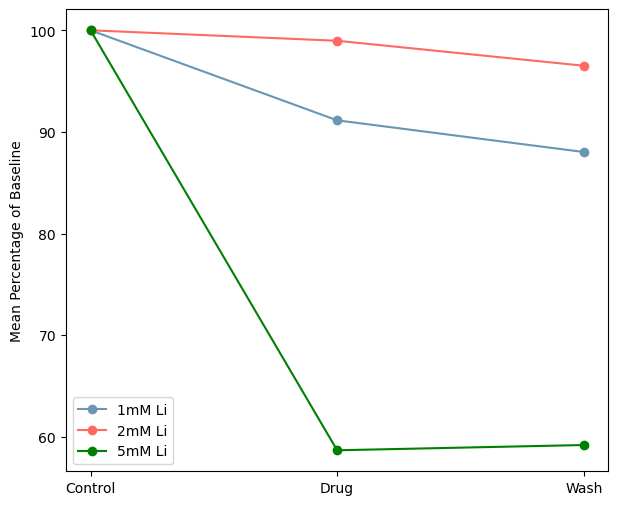

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Normalized data (data from previous normalization - manual import)
data = {
    '1': {
        'Control': [100, 100, 100, 100],
        'Drug': [93.65047619047618, 100.0, 70.92063492063491, 100.0],
        'Wash': [93.65047619047618, 80.0, 64.57142857142857, 113.88059701492537]
    },
    '2': {
        'Control': [100, 100, 100, 100],
        'Drug': [150.05086469989828, 85.84615384615385, 59.9803343166175, 100.0],
        'Wash': [150.05086469989828, 85.84615384615385, 59.9803343166175, 90.17038007863695]
    },
    '5': {
        'Control': [100, 100, 100, 100, 100],
        'Drug': [53.73134328358209, 77.45876243028711, 6.801904761904762, 64.6778042959427, 90.76923076923077],
        'Wash': [97.51283582089553, 77.04859984065627, 4.32952380952381, 7.517899761336515, 109.61538461538463]
    }
}

# Define function to calculate mean percentage
def calculate_means(data):
    means = {}
    for condition, values in data.items():
        means[condition] = np.mean(values)
    return means

# Prepare data for plotting
labels = ['Control', 'Drug', 'Wash']
x = [0, 1, 2]  # Positions for Control, Drug, Wash

fig, ax = plt.subplots(figsize=(7, 6))  # Adjusted to make the plot square
colors = ['#6996b3', '#ff6961', 'green']  # colors for 50µM, 100µM, 200µM

# Plot data
for i, (conc, color) in enumerate(zip(['1', '2', '5'], colors)):
    means = calculate_means(data[conc])
    y = [means[label] for label in labels]  # Get mean % values in order
    ax.plot(x, y, marker='o', linestyle='-', color=color, label=f'{conc}mM Li')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Percentage of Baseline')
ax.legend()
ax.grid(False)
plt.show()


In [122]:
# Calculate means and standard deviations for each concentration
means = {}
std_devs = {}
for conc, values in data.items():
    conc_means = {}
    conc_std_devs = {}
    for condition, values_list in values.items():
        conc_means[condition] = np.mean(values_list)
        conc_std_devs[condition] = np.std(values_list)
    means[conc] = conc_means
    std_devs[conc] = conc_std_devs

# Output means and standard deviations
for conc, conc_data in means.items():
    print(f"Concentration {conc}µM:")
    for condition, mean_value in conc_data.items():
        std_dev_value = std_devs[conc][condition]
        print(f"  {condition}: Mean = {mean_value:.2f}, SD = {std_dev_value:.2f}")

Concentration 1µM:
  Control: Mean = 100.00, SD = 0.00
  Drug: Mean = 91.14, SD = 11.96
  Wash: Mean = 88.03, SD = 18.13
Concentration 2µM:
  Control: Mean = 100.00, SD = 0.00
  Drug: Mean = 98.97, SD = 32.80
  Wash: Mean = 96.51, SD = 33.00
Concentration 5µM:
  Control: Mean = 100.00, SD = 0.00
  Drug: Mean = 58.69, SD = 28.75
  Wash: Mean = 59.20, SD = 44.74


### Li integrated power stats

In [118]:
li_1_power_data = {'Control':[3140.8896, 2548.132, 5347.3406, 2767.7079],
                  'Drug': [5408.4339, 2879.1191, 4845.3175, 2444.8802], 
                  'Wash': [5265.2891, 2579.3279, 5189.2615, 3424.3042]
                 }
li_2_power_data = {'Control': [5265.2891, 2579.3279, 5189.2615, 3424.3042],
                   'Drug': [5892.7806, 1883.6208, 4944.1828, 4455.0775],
                   'Wash': [7242.6688, 2200.892, 5804.0494, 3981.6143]
                  }
li_5_power_data = {'Control': [4015.9966, 774.2919, 591.6976, 641.8314, 698.2027], 
                   'Drug': [913.435, 848.1124, 215.1146, 437.4188, 807.7842], 
                   'Wash': [4092.3077, 2158.8395, 206.0836, 538.2825, 983.2525]
                  }

In [119]:
# Normalize each dataset
normalized_li_1_power = normalize_dataset(li_1_power_data)
normalized_li_2_power = normalize_dataset(li_2_power_data)
normalized_li_5_power = normalize_dataset(li_5_power_data)

# Output the normalized data
print("Normalized Power Data for Li 1mM:")
print(normalized_li_1_power)
print("Normalized Power Data for Li 2mM:")
print(normalized_li_2_power)
print("Normalized Power Data for Li 5mM:")
print(normalized_li_5_power)

Normalized Power Data for Li 1mM:
{'Control': [100, 100, 100, 100], 'Drug': [172.19433309594837, 112.9894016479523, 90.6117238913115, 88.33591868563876], 'Wash': [167.63687268727944, 101.22426546191485, 97.04378097778172, 123.72346807262429]}
Normalized Power Data for Li 2mM:
{'Control': [100, 100, 100, 100], 'Drug': [111.91751275347825, 73.02758210772659, 95.27719503054529, 130.10168605931682], 'Wash': [137.5550071884942, 85.32811977879973, 111.84731006521835, 116.27513408417396]}
Normalized Power Data for Li 5mM:
{'Control': [100, 100, 100, 100, 100], 'Drug': [22.744914674479556, 109.53393674917689, 36.35549645629795, 68.15166724470008, 115.69479751367334], 'Wash': [101.90017840154546, 278.814682163148, 34.8292100559475, 83.86665096160768, 140.82622424691283]}


In [120]:
# Perform tests for each dataset
test_results_li_1_power = test_against_control(normalized_li_1_power)
test_results_li_2_power = test_against_control(normalized_li_2_power)
test_results_li_5_power = test_against_control(normalized_li_5_power)

# Output the test results
print("Test Results for Li_1mM Power:")
print(test_results_li_1_power)
print("Test Results for Li_2mM Power:")
print(test_results_li_2_power)
print("Test Results for Li_5mM Power:")
print(test_results_li_5_power)

Test Results for Li_1mM Power:
{'Drug': {'t_statistic': 0.8209630820148425, 'p_value': 0.47182781611985053}, 'Wash': {'t_statistic': 1.385312196401617, 'p_value': 0.2599901310124462}}
Test Results for Li_2mM Power:
{'Drug': {'t_statistic': 0.2124371601232362, 'p_value': 0.8453815682400698}, 'Wash': {'t_statistic': 1.1888627583085896, 'p_value': 0.32002237549093937}}
Test Results for Li_5mM Power:
{'Drug': {'t_statistic': -1.5750083757024786, 'p_value': 0.19037466691615995}, 'Wash': {'t_statistic': 0.6780656759406806, 'p_value': 0.5349283334106353}}


### Li Epileptiform T-Test

In [74]:
#Load the data 
baseline_freq_5mM = [0.144528571,0.094688889, 0.0488, 0.142062963] 
baseline_amp_5mM = [2.259055172, 1.340884211, 1.66446, 6.118614286]

five_min_freq_5mM = [0.206375, 0.121904348, 0.068253846, 0.152833333]
five_min_amp_5mM = [1.952426829, 0.946641667, 1.723864286, 5.801725806] 

ten_min_freq_5mM = [0.2067225, 0.18442, 0.076885714, 0.181479412]
ten_min_amp_5mM = [1.867431707, 0.951997222, 2.059786667, 5.651077143]

twenty_min_freq_5mM = [0.225895455, 0.17058125, 0.070292308, 0.191061111] 
twenty_min_amp_5mM = [1.660617778, 1.220857576, 2.070957143, 5.138530556]

wash_freq_5mM = [0.198538462, 0.101542105, 0.024375, 0.183274286]
wash_amp_5mM = [1.5565675, 1.10535, 2.08452, 4.248130556]

baseline_freq_10mM = [0.306165, 0.2094725, 0.225448889] 
baseline_amp_10mM = [1.293162295, 0.49022439, 1.515756522]

five_min_freq_10mM = [0.503545361, 0.266307547, 0.284492727]
five_min_amp_10mM = [0.904670408, 0.391912963, 1.417821429] 

ten_min_freq_10mM = [0.580791589, 0.288514286, 0.281812727]
ten_min_amp_10mM = [0.346012037, 0.291085965, 1.273275]

twenty_min_freq_10mM = [0, 0, 0] 
twenty_min_amp_10mM = [0, 0, 0]

wash_freq_10mM = [0.431880247, 0.243158696, 0.227268182]
wash_amp_10mM = [0.333252439, 0.257538298, 1.400684444]

In [75]:
#Normalise the data with respect to baseline 
import numpy as np
from scipy.stats import ttest_rel

def normalize_data(baseline, values):
    return [value / base * 100 for base, value in zip(baseline, values)]

# Baseline data (set to 100%)
baseline_freq_5mM_norm = [100] * len(baseline_freq_5mM)
baseline_amp_5mM_norm = [100] * len(baseline_amp_5mM)
baseline_freq_10mM_norm = [100] * len(baseline_freq_10mM)
baseline_amp_10mM_norm = [100] * len(baseline_amp_10mM)

# Normalize other time points
freq_5mM_norm = {
    '5_min': normalize_data(baseline_freq_5mM, five_min_freq_5mM),
    '10_min': normalize_data(baseline_freq_5mM, ten_min_freq_5mM),
    '20_min': normalize_data(baseline_freq_5mM, twenty_min_freq_5mM),
    'wash': normalize_data(baseline_freq_5mM, wash_freq_5mM)
}
amp_5mM_norm = {
    '5_min': normalize_data(baseline_amp_5mM, five_min_amp_5mM),
    '10_min': normalize_data(baseline_amp_5mM, ten_min_amp_5mM),
    '20_min': normalize_data(baseline_amp_5mM, twenty_min_amp_5mM),
    'wash': normalize_data(baseline_amp_5mM, wash_amp_5mM)
}

freq_10mM_norm = {
    '5_min': normalize_data(baseline_freq_10mM, five_min_freq_10mM),
    '10_min': normalize_data(baseline_freq_10mM, ten_min_freq_10mM),
    '20_min': normalize_data(baseline_freq_10mM, twenty_min_freq_10mM),
    'wash': normalize_data(baseline_freq_10mM, wash_freq_10mM)
}
amp_10mM_norm = {
    '5_min': normalize_data(baseline_amp_10mM, five_min_amp_10mM),
    '10_min': normalize_data(baseline_amp_10mM, ten_min_amp_10mM),
    '20_min': normalize_data(baseline_amp_10mM, twenty_min_amp_10mM),
    'wash': normalize_data(baseline_amp_10mM, wash_amp_10mM)
}


In [77]:
#Do the stats test 
def perform_tests(baseline, data_points):
    results = {}
    for key, values in data_points.items():
        t_stat, p_val = ttest_rel(baseline, values)
        results[key] = {'t_stat': t_stat, 'p_value': p_val}
    return results

# Calculate t-tests for 5mM concentration
t_tests_freq_5mM = perform_tests(baseline_freq_5mM_norm, freq_5mM_norm)
t_tests_amp_5mM = perform_tests(baseline_amp_5mM_norm, amp_5mM_norm)

# Calculate t-tests for 10mM concentration
t_tests_freq_10mM = perform_tests(baseline_freq_10mM_norm, freq_10mM_norm)
t_tests_amp_10mM = perform_tests(baseline_amp_10mM_norm, amp_10mM_norm)

# Print results
print("5mM Frequency Tests:", t_tests_freq_5mM)
print("5mM Amplitude Tests:", t_tests_amp_5mM)
print("10mM Frequency Tests:", t_tests_freq_10mM)
print("10mM Amplitude Tests:", t_tests_amp_10mM)


5mM Frequency Tests: {'5_min': {'t_stat': -3.7257533392679263, 'p_value': 0.033673236794176706}, '10_min': {'t_stat': -3.8864667896084573, 'p_value': 0.03019255544729902}, '20_min': {'t_stat': -5.446228749690239, 'p_value': 0.012157179800600191}, 'wash': {'t_stat': -0.2990637687724447, 'p_value': 0.78441213118155}}
5mM Amplitude Tests: {'5_min': {'t_stat': 1.58787980031393, 'p_value': 0.2105168320280615}, '10_min': {'t_stat': 0.6680146578012175, 'p_value': 0.551923012795719}, '20_min': {'t_stat': 0.6144666265219162, 'p_value': 0.582367380315414}, 'wash': {'t_stat': 1.0160443996671615, 'p_value': 0.3844209908143853}}
10mM Frequency Tests: {'5_min': {'t_stat': -3.114793633881383, 'p_value': 0.08945721722940309}, '10_min': {'t_stat': -2.567739143939896, 'p_value': 0.12406614674506909}, '20_min': {'t_stat': inf, 'p_value': 0.0}, 'wash': {'t_stat': -1.6464202761666131, 'p_value': 0.24142592710877867}}
10mM Amplitude Tests: {'5_min': {'t_stat': 2.758761545574458, 'p_value': 0.110112351927961

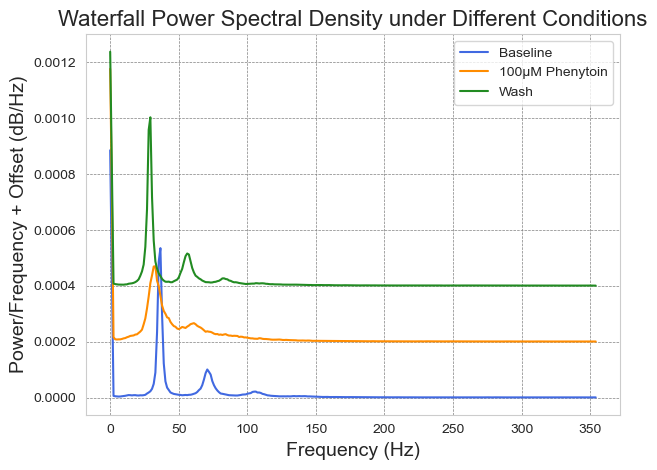

In [14]:
for file_path, label, color in zip(file_paths, labels, colors):
    data = np.genfromtxt(file_path, skip_header=1, delimiter="\t")
    frequencies = data[:, 0]
    power_density = data[:, 1] + offset  # Apply offset here
    plt.plot(frequencies, power_density, label=label, color=color, linestyle='-', linewidth=1.5)
    offset += offset_increment  # Increase offset for the next dataset

# Enhancements
plt.title('Waterfall Power Spectral Density under Different Conditions', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Power/Frequency + Offset (dB/Hz)', fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5, color='gray')
plt.legend(loc='upper right')
plt.tight_layout()

Plotting Baseline with data points: 291
Plotting 100µM Phenytoin with data points: 291
Plotting Wash with data points: 291


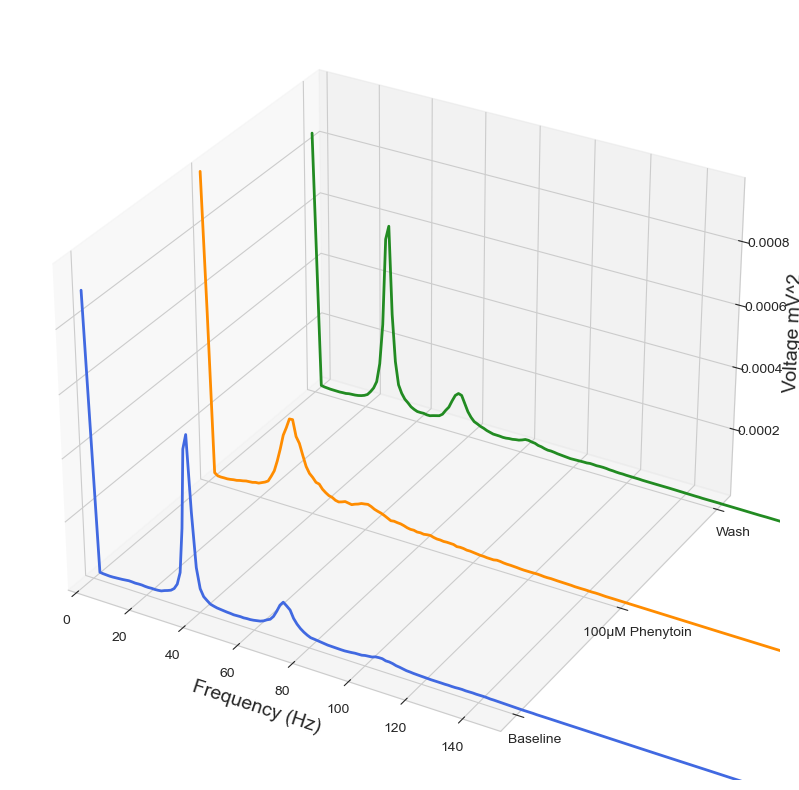

In [16]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for file_path, label, color, z in zip(file_paths, labels, colors, z_pos):
    try:
        data = np.genfromtxt(file_path, skip_header=1, delimiter="\t")
        frequencies = data[:, 0]
        power_density = data[:, 1]
        print(f"Plotting {label} with data points: {len(frequencies)}")  # Debug print
        ax.plot(frequencies, np.ones(frequencies.shape) * z, power_density, label=label, color=color, linestyle='-', linewidth=2)
    except Exception as e:
        print(f"Error while plotting {label}: {e}")

ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_zlabel('Voltage mV^2', fontsize=14)
ax.set_yticks(z_pos)
ax.set_yticklabels(labels)
ax.set_xlim(0,150)

plt.show()

In [28]:
li_file_paths

'/'